# Installing packages section

In [ ]:
# Installing packages set for without init script
!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]"  
!pip install fosforio[snowflake]

# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
from fosforio import get_dataframe
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import warnings; warnings.simplefilter('ignore')
from joblib import dump, load
import requests
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import configparser
from dateutil.relativedelta import relativedelta
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.


# Fetching the datasets

In [2]:
from fosforio import snowflake
from fosforio import get_dataframe

snowflake.get_connection(connection_name="ME_AD_SALES_CXN")

Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f32583a07c0>
Please close the connection after use!


In [3]:
df_all = get_dataframe("DF_ALL")
df_opt = get_dataframe("DF_OPT")

Reading dataframe from snowflake native connector
Reading dataframe from snowflake native connector


In [4]:
df_all

,AD_DATE,TOTAL_IMPRESSIONS,TOTAL_REVENUE,VIEWABLE_IMPRESSIONS,MEASURABLE_IMPRESSIONS,AD_TYPE,AD_FORMAT,AD_MEDIA_TYPE,DEVICE_TYPE,CITY,POPULATION,CITY_LAT,CITY_LON,LINE_ITEM_GROUP,LINE_ITEM_TYPE,MONETIZATION_CHANNEL,OS_TYPE,SITE_ID,ADVERTISER_ID
0,16-06-2024,122,0.3712,56,122,interactive,Interstitial,gif,laptop,New York,8258035,40.66,-73.94,non_guaranteed,ad_exchange,in_app_advertising,ios,343,8
1,16-06-2024,170,0.5224,56,170,interactive,in_content,shorts,laptop,New York,8258035,40.66,-73.94,non_guaranteed,ad_exchange,in_app_advertising,ios,351,8
2,16-06-2024,172,0.6732,56,170,interactive,in_content,survey,tablet,New York,8258035,40.66,-73.94,non_guaranteed,ad_exchange,in_app_advertising,android,351,8
3,16-06-2024,120,0.0000,58,120,interactive,banner_customizable,html5,phone,Los Angeles,3820914,34.02,-118.41,non_guaranteed,adsense,sponsorship,mac,347,2639
4,16-06-2024,50,0.0000,58,50,non_interactive,native_rich,content,laptop,New York,8258035,40.66,-73.94,non_guaranteed,ad_exchange,in-app_purchases,ios,346,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567286,15-07-2024,28,0.1822,6,22,interactive,rewarded interstitial_customizable,html5,laptop,El Paso,678958,31.85,-106.43,guaranteed,standard,in-app_purchases,ios,346,79
567287,15-07-2024,156,0.2130,6,156,interactive,retargetted,gif,laptop,New York,8258035,40.66,-73.94,non_guaranteed,ad_exchange,in_app_advertising,windows,349,8
567288,15-07-2024,108,0.2160,6,108,interactive,in_feed,survey,laptop,New York,8258035,40.66,-73.94,non_guaranteed,ad_exchange,sponsorship,windows,350,2634
567289,15-07-2024,122,0.2174,6,122,interactive,banner_customizable,gif,laptop,New York,8258035,40.66,-73.94,non_guaranteed,ad_exchange,in_app_advertising,ios,343,90


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AD_DATE                 567291 non-null  object 
 1   TOTAL_IMPRESSIONS       567291 non-null  int16  
 2   TOTAL_REVENUE           567291 non-null  float64
 3   VIEWABLE_IMPRESSIONS    567291 non-null  int16  
 4   MEASURABLE_IMPRESSIONS  567291 non-null  int16  
 5   AD_TYPE                 567291 non-null  object 
 6   AD_FORMAT               567291 non-null  object 
 7   AD_MEDIA_TYPE           567291 non-null  object 
 8   DEVICE_TYPE             567291 non-null  object 
 9   CITY                    567291 non-null  object 
 10  POPULATION              567291 non-null  int32  
 11  CITY_LAT                567291 non-null  float64
 12  CITY_LON                567291 non-null  float64
 13  LINE_ITEM_GROUP         567291 non-null  object 
 14  LINE_ITEM_TYPE      

In [6]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AD_DATE                 567291 non-null  object 
 1   DEVICE_TYPE             567291 non-null  object 
 2   CITY                    567291 non-null  object 
 3   POPULATION              567291 non-null  int32  
 4   CITY_LAT                567291 non-null  float64
 5   CITY_LON                567291 non-null  float64
 6   MONETIZATION_CHANNEL    567291 non-null  object 
 7   OS_TYPE                 567291 non-null  object 
 8   SITE_ID                 567291 non-null  int16  
 9   ADVERTISER_ID           567291 non-null  int16  
 10  TOTAL_REVENUE           567291 non-null  float64
 11  TOTAL_IMPRESSIONS       567291 non-null  int16  
 12  VIEWABLE_IMPRESSIONS    567291 non-null  int16  
 13  MEASURABLE_IMPRESSIONS  567291 non-null  int16  
 14  AD_TYPE             

In [8]:
df_opt.columns = df_opt.columns.str.lower()
df_all.columns = df_all.columns.str.lower()

# Exploratory data analysis

In [10]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
num_col=list(df_all.select_dtypes(np.number).columns)

In [17]:
null_counts = df_all.isnull().sum()

null_counts = null_counts[null_counts > 0]

if not null_counts.empty:
    plt.figure(figsize=(12, 8))
    null_counts.plot(kind='bar', color='skyblue')
    plt.title('Count of Null Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Null Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


ValueError: Could not interpret value `ad_type_id` for `x`. An entry with this name does not appear in `data`.

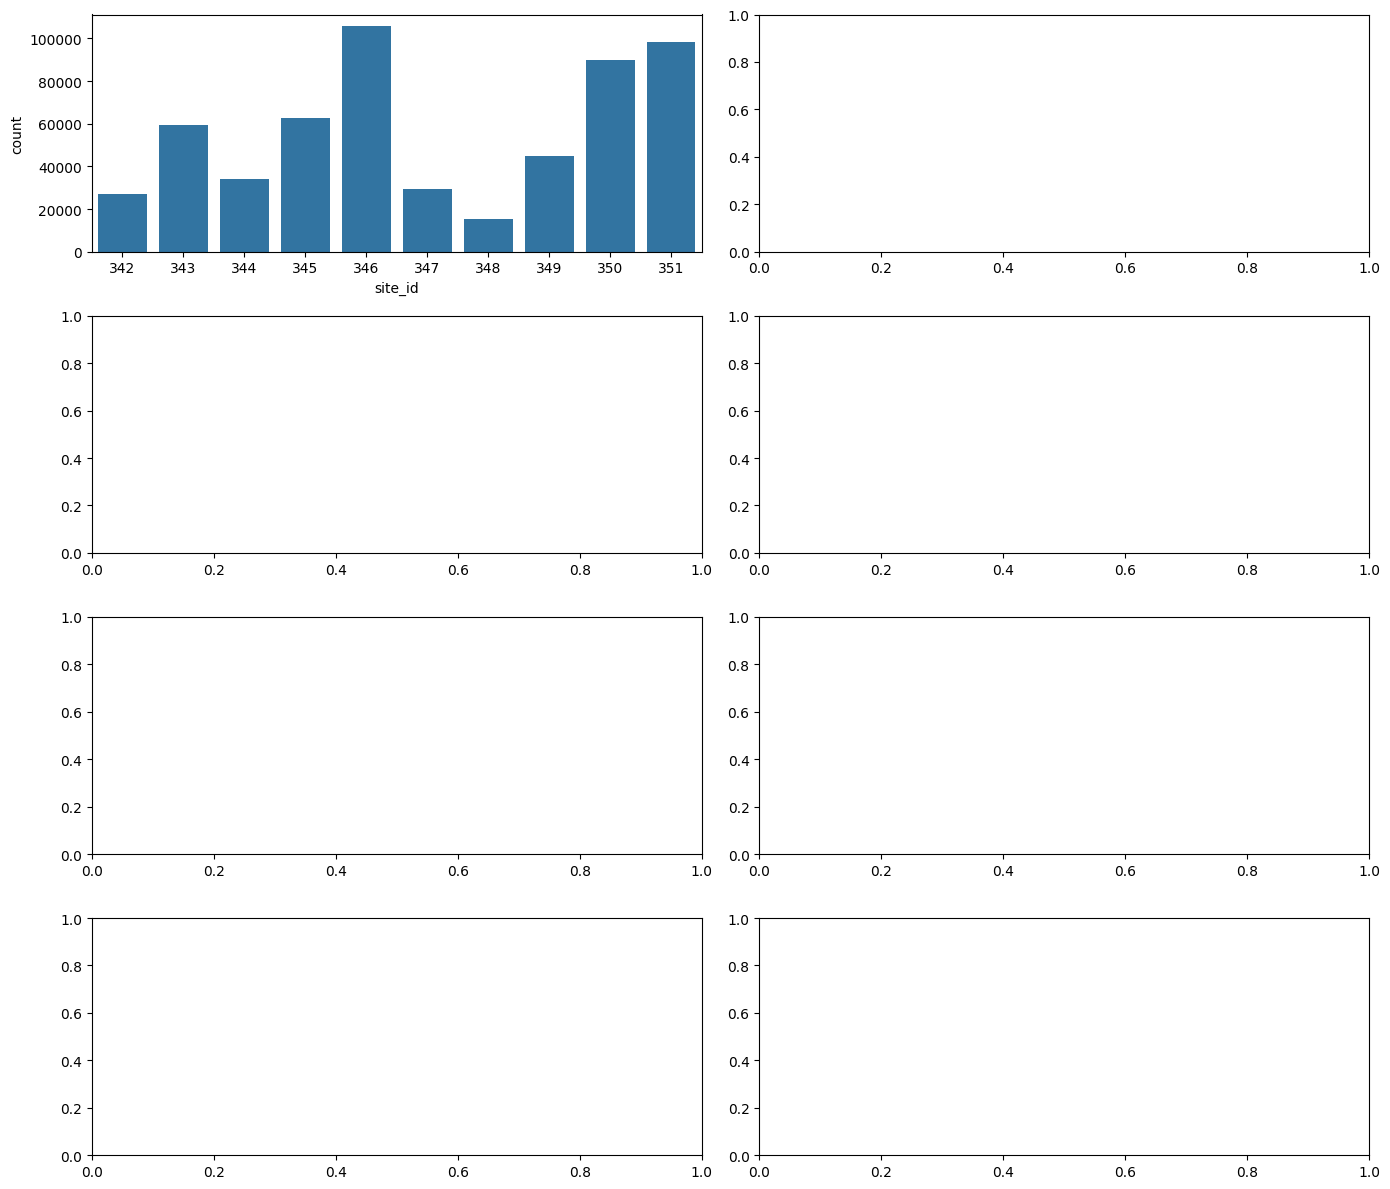

In [21]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df_all,x=col,ax=axes_[i])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.tight_layout()